In [81]:
import pandas as pd
import numpy as np

In [82]:
df=pd.read_csv("Synthetic_dataset_1")
df_main=pd.read_csv("creditcard.csv")

In [83]:
X=df.drop('Class',axis=1)
Y=df['Class']


In [84]:
x=X.to_numpy()
y=Y.to_numpy()

In [85]:
model_result={}
def store(model_name,r2,mse,acc):
    
    model_result[model_name]={
        'mse':mse,
        'r2':r2,
        'acc':acc
        
    }
    print("successfully stored into dictionary")
    

In [86]:
store('original_dataset_tested', 0.7444583137137805, 0.00043888908395070395, 0.9995611109160493)

successfully stored into dictionary


In [7]:
print(model_result)

{'original_dataset_tested': {'mse': 0.00043888908395070395, 'r2': 0.7444583137137805, 'acc': 0.9995611109160493}}


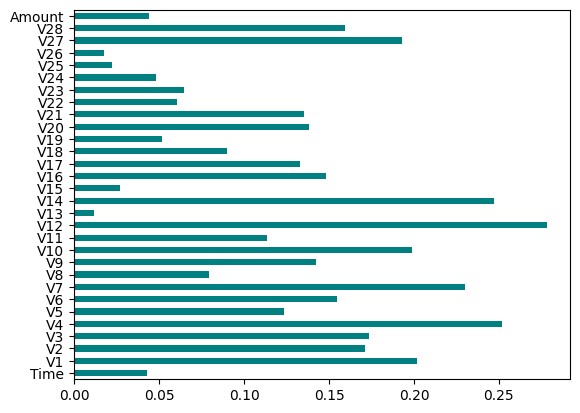

In [8]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importance =mutual_info_classif(X,Y)
feat_importance=pd.Series(importance,df.columns[0:len(df.columns)-1])

feat_importance.plot(kind='barh', color='teal')
plt.show()

In [9]:
feat_importance

Time      0.042699
V1        0.201918
V2        0.171217
V3        0.173263
V4        0.251624
V5        0.123703
V6        0.154757
V7        0.229991
V8        0.079376
V9        0.142589
V10       0.198573
V11       0.113689
V12       0.278098
V13       0.011770
V14       0.247241
V15       0.027063
V16       0.148447
V17       0.132923
V18       0.089682
V19       0.051573
V20       0.138043
V21       0.135358
V22       0.060304
V23       0.064643
V24       0.048026
V25       0.022421
V26       0.017722
V27       0.193053
V28       0.159291
Amount    0.043761
dtype: float64

In [10]:
df_columns_ig=['V12','V4','V14','V7','V1','V10','V27','V3','V2','V28','Class']

In [11]:
df_ig=df[df_columns_ig]

In [12]:
from sklearn.model_selection import train_test_split

# Sample a smaller subset (adjust sample_size as needed)
sample_size = 10000
X_sample, _, y_sample, _ = train_test_split(x, y, test_size=1 - sample_size/len(y), random_state=42)

# Calculate Fisher core on the sample dataset
# (Use a different feature selection method or implement custom logic)


In [13]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline
ranls=fisher_score.fisher_score(X_sample,y_sample)

<Axes: >

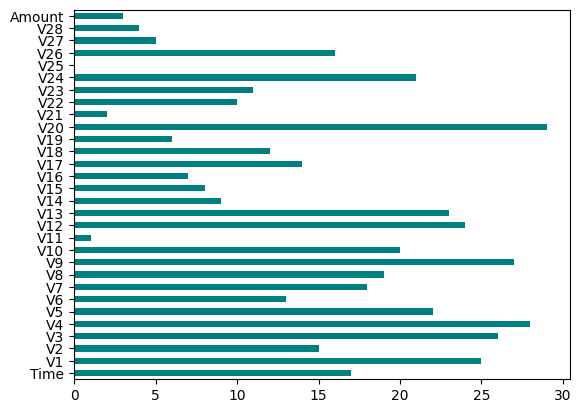

In [14]:
importances=pd.Series(ranls,df.columns[0:len(df.columns)-1])
importances.plot(kind='barh',color='teal')

In [23]:


# importances

In [16]:
df_columns_fs=['V11','V21','Amount','V28','V27','V19','V16','V15','V14','V22','Class']

In [24]:
df_fs=df[df_columns_fs]
# df_fs


In [22]:
# import seaborn as sns
# corr_mat=df.corr()
# plt.figure(figsize=(20,10))
# sns.heatmap(corr_mat, annot=True,cmap='Purples_r')
# plt.title("correlation after datasynthesis")
# plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [63]:
model_for_ig=RandomForestClassifier()
model_for_fs=RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(df_ig.drop('Class',axis=1),df_ig['Class'],test_size=0.2,random_state=42)
X_train_fs,X_test_fs,y_train_fs,y_test_fs=train_test_split(df_fs.drop('Class',axis=1),df_fs['Class'],test_size=0.2,random_state=42)

In [31]:
model_for_ig.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
model_for_fs.fit(X_train_fs,y_train_fs)

RandomForestClassifier()

In [58]:
y_pred=model_for_ig.predict(X_test)

In [65]:
y_pred_fs=model_for_fs.predict(X_test_fs)


In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [90]:
mean_error=mse(y_test_fs,y_pred_fs)
r2=r2_score(y_test_fs,y_pred_fs)
acc=accuracy_score(y_test_fs,y_pred_fs)
print(mean_error,r2,acc)


0.10325 0.58107760614436 0.89675


In [91]:
store('Synthesized dataset(fisher_score',mean_error,r2,acc)
model_result

successfully stored into dictionary


{'original_dataset_tested': {'mse': 0.00043888908395070395,
  'r2': 0.7444583137137805,
  'acc': 0.9995611109160493},
 'Synthesized dataset(Information Gain)': {'mse': 0.7926689169392426,
  'r2': 0.0511,
  'acc': 0.9489},
 'Synthesized dataset(fisher_score': {'mse': 0.58107760614436,
  'r2': 0.10325,
  'acc': 0.89675}}

In [96]:
model_result

{'original_dataset_tested': {'mse': 0.00043888908395070395,
  'r2': 0.7444583137137805,
  'acc': 0.9995611109160493},
 'Synthesized dataset(Information Gain)': {'mse': 0.7926689169392426,
  'r2': 0.0511,
  'acc': 0.9489},
 'Synthesized dataset(fisher_score': {'mse': 0.58107760614436,
  'r2': 0.10325,
  'acc': 0.89675}}

In [105]:
import csv
with open("Evaluation_metric","a",newline="") as csvfile:
    writer=csv.DictWriter(csvfile,fieldnames=model_result.keys())
    writer.writeheader()
    




In [101]:
print(model_result1)

{'original_dataset_tested': {'mse': 0.00043888908395070395, 'r2': 0.7444583137137805, 'acc': 0.9995611109160493}, 'Synthesized dataset(Information Gain)': {'mse': 0.7926689169392426, 'r2': 0.0511, 'acc': 0.9489}, 'Synthesized dataset(fisher_score': {'mse': 0.58107760614436, 'r2': 0.10325, 'acc': 0.89675}}
